In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from subprocess import check_output
print(check_output(["ls", "../../data/input"]).decode("utf8"))

BTC_XRP_5min.csv
EURUSD_15m_BID_sample.csv
EURUSD_Candlestick_15_M_ASK_01.01.2017-20.07.2018.csv
EURUSD_Candlestick_15_M_BID_01.01.2017-20.07.2018.csv
README.md
stocks.csv



In [22]:
from datetime import datetime
d_parser = (lambda dt: datetime.strptime(dt[:-4], '%d.%m.%Y %H:%M:%S'))
df = pd.read_csv("../../data/input/EURUSD_Candlestick_15_M_ASK_01.01.2017-20.07.2018.csv", sep=',', header=0, index_col=0, parse_dates=['Time'], date_parser=d_parser)
df.rename(columns={'Time' : 'timestamp', 'Open' : 'open', 'Close' : 'close', 
                   'High' : 'high', 'Low' : 'low', 'Close' : 'close', 'Volume' : 'volume'}, inplace=True)
df = df.astype(float)
df.head()

,open,high,low,close,volume
Time,,,,,
2017-01-01 22:00:00,1.05236,1.05248,1.05225,1.05226,13.86
2017-01-01 22:15:00,1.05226,1.05250,1.05226,1.05236,16.75
2017-01-01 22:30:00,1.05236,1.05252,1.05221,1.05250,71.74
2017-01-01 22:45:00,1.05246,1.05253,1.05226,1.05227,41.19
2017-01-01 23:00:00,1.05227,1.05426,1.05226,1.05335,140.08


In [23]:
df.count()

open      38880
high      38880
low       38880
close     38880
volume    38880
dtype: int64

In [24]:
df.index.min(), df.index.max()


(Timestamp('2017-01-01 22:00:00'), Timestamp('2018-07-20 20:45:00'))

In [25]:
# Rename bid OHLC columns
# df.rename(columns={'Time' : 'timestamp', 'Open' : 'open', 'Close' : 'close', 
#                    'High' : 'high', 'Low' : 'low', 'Close' : 'close', 'Volume' : 'volume'}, inplace=True)
# df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
# df.set_index('timestamp', inplace=True)
# df = df.astype(float)
# df.head()

In [26]:
# Add additional features
df['hour'] = df.index.hour
df['day']  = df.index.weekday
df['week'] = df.index.week
df['momentum']  = df['volume'] * (df['open'] - df['close'])
df['avg_price'] = (df['low'] + df['high'])/2
df['range']     = df['high'] - df['low']
df['ohlc_price'] = (df['low'] + df['high'] + df['open'] + df['close'])/4
df['oc_diff']    = df['open'] - df['close']

# Cannot add ASK related features, which will limit the accuracy of the model

In [27]:
# Add PCA as a feature instead of for reducing the dimensionality. This improves the accuracy a bit.
from sklearn.decomposition import PCA

dataset = df.copy().values.astype('float32')
pca_features = df.columns.tolist()

pca = PCA(n_components=1)
df['pca'] = pca.fit_transform(dataset)

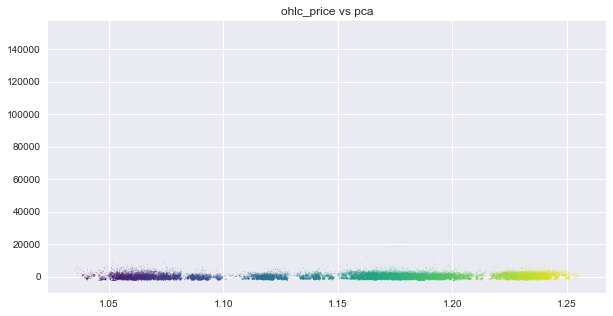

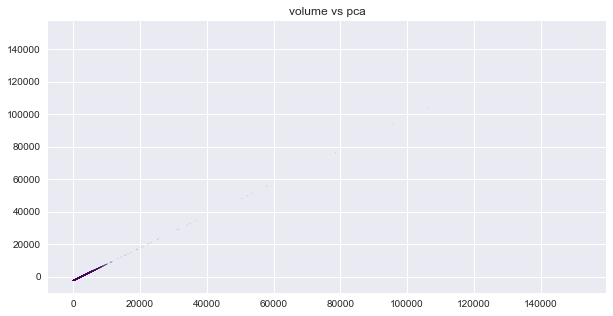

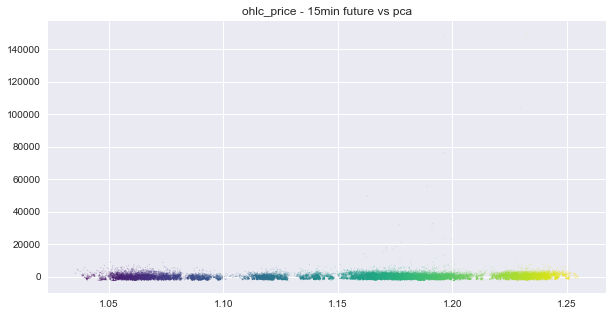

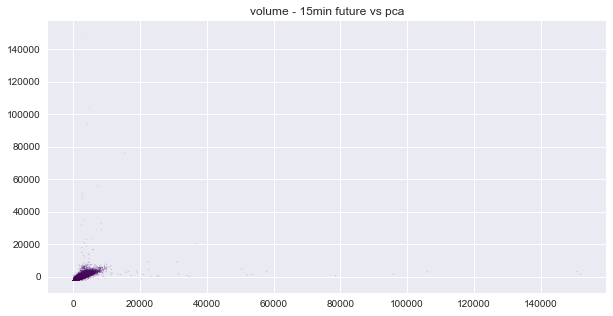

In [28]:
import matplotlib.colors as colors
import matplotlib.cm as cm
import pylab

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['ohlc_price'].values.min(), df['ohlc_price'].values.max())
color = cm.viridis(norm(df['ohlc_price'].values))
plt.scatter(df['ohlc_price'].values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('ohlc_price vs pca')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['volume'].values.min(), df['volume'].values.max())
color = cm.viridis(norm(df['volume'].values))
plt.scatter(df['volume'].values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('volume vs pca')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['ohlc_price'].values.min(), df['ohlc_price'].values.max())
color = cm.viridis(norm(df['ohlc_price'].values))
plt.scatter(df['ohlc_price'].shift().values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('ohlc_price - 15min future vs pca')
plt.show()

plt.figure(figsize=(10,5))
norm = colors.Normalize(df['volume'].values.min(), df['volume'].values.max())
color = cm.viridis(norm(df['volume'].values))
plt.scatter(df['volume'].shift().values, df['pca'].values, lw=0, c=color, cmap=pylab.cm.cool, alpha=0.3, s=1)
plt.title('volume - 15min future vs pca')
plt.show()

In [29]:
df.head()

,open,high,low,close,volume,hour,day,week,momentum,avg_price,range,ohlc_price,oc_diff,pca
Time,,,,,,,,,,,,,,
2017-01-01 22:00:00,1.05236,1.05248,1.05225,1.05226,13.86,22,6,52,0.001386,1.052365,0.00023,1.052338,0.00010,-2367.357666
2017-01-01 22:15:00,1.05226,1.05250,1.05226,1.05236,16.75,22,6,52,-0.001675,1.052380,0.00024,1.052345,-0.00010,-2364.478516
2017-01-01 22:30:00,1.05236,1.05252,1.05221,1.05250,71.74,22,6,52,-0.010044,1.052365,0.00031,1.052398,-0.00014,-2309.488525
2017-01-01 22:45:00,1.05246,1.05253,1.05226,1.05227,41.19,22,6,52,0.007826,1.052395,0.00027,1.052380,0.00019,-2340.038574
2017-01-01 23:00:00,1.05227,1.05426,1.05226,1.05335,140.08,23,6,52,-0.151286,1.053260,0.00200,1.053035,-0.00108,-2241.148926


In [30]:
def create_dataset(dataset, look_back=20):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

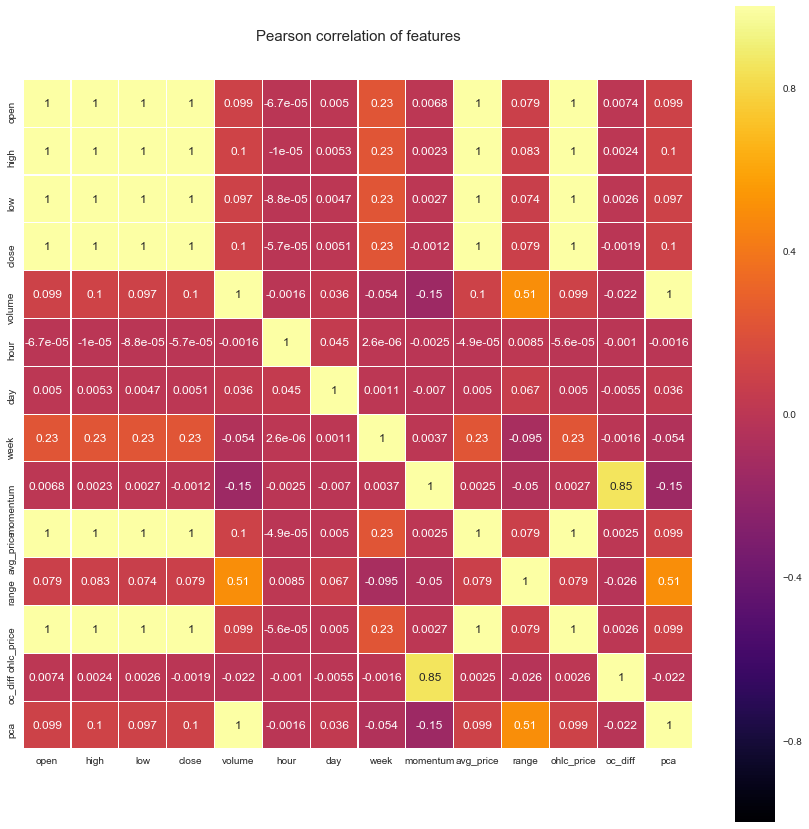

In [31]:
colormap = plt.cm.inferno
plt.figure(figsize=(15,15))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

plt.figure(figsize=(15,5))
corr = df.corr()
sns.heatmap(corr[corr.index == 'close'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True);

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Scale and create datasets
target_index = df.columns.tolist().index('close')
dataset = df.values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Set look_back to 20 which is 5 hours (15min*20)
X, y = create_dataset(dataset, look_back=1)
y = y[:,target_index]
X = np.reshape(X, (X.shape[0], X.shape[2]))

In [34]:
forest = RandomForestRegressor(n_estimators = 100)
forest = forest.fit(X, y)

Feature ranking:
0. close 3 (0.645992)
1. ohlc_price 11 (0.226210)
2. open 0 (0.054669)
3. avg_price 9 (0.040802)
4. low 2 (0.031737)
5. high 1 (0.000546)
6. momentum 8 (0.000007)
7. range 10 (0.000007)
8. pca 13 (0.000006)
9. volume 4 (0.000006)
10. oc_diff 12 (0.000005)
11. hour 5 (0.000005)
12. week 7 (0.000004)


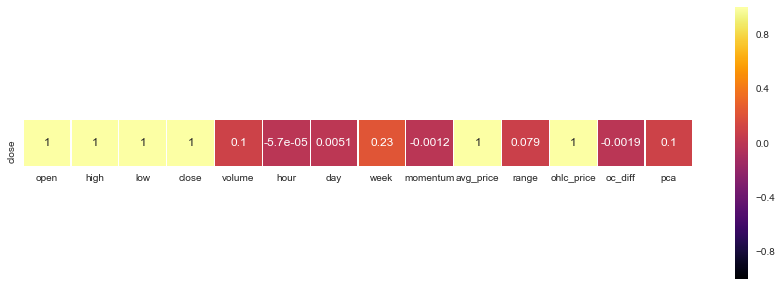

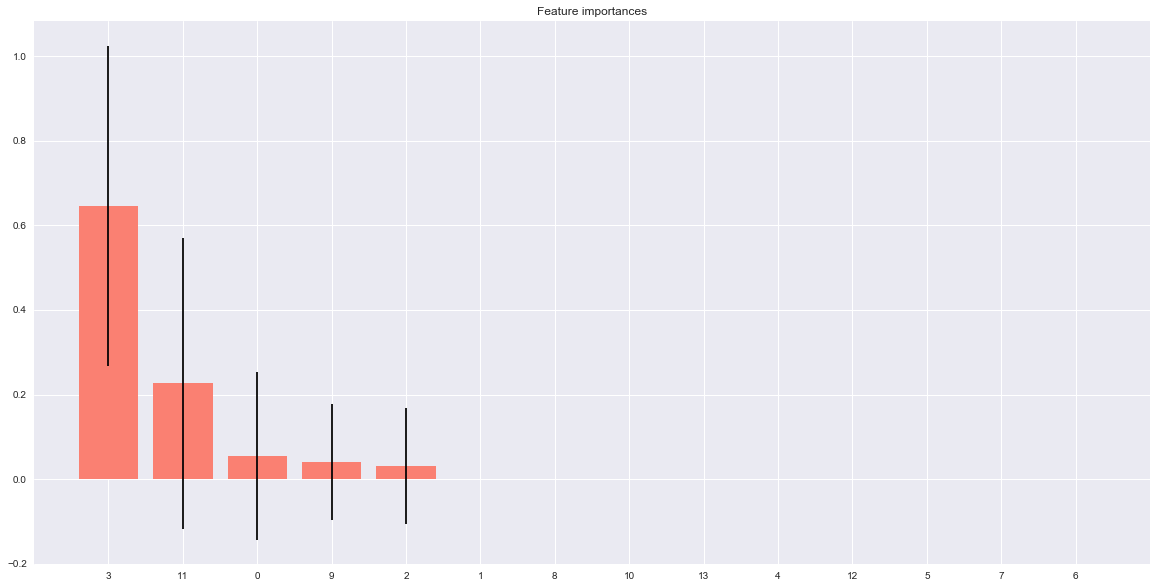

In [35]:
importances = forest.feature_importances_
std = np.std([forest.feature_importances_ for forest in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

column_list = df.columns.tolist()
print("Feature ranking:")
for f in range(X.shape[1]-1):
    print("%d. %s %d (%f)" % (f, column_list[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="salmon", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


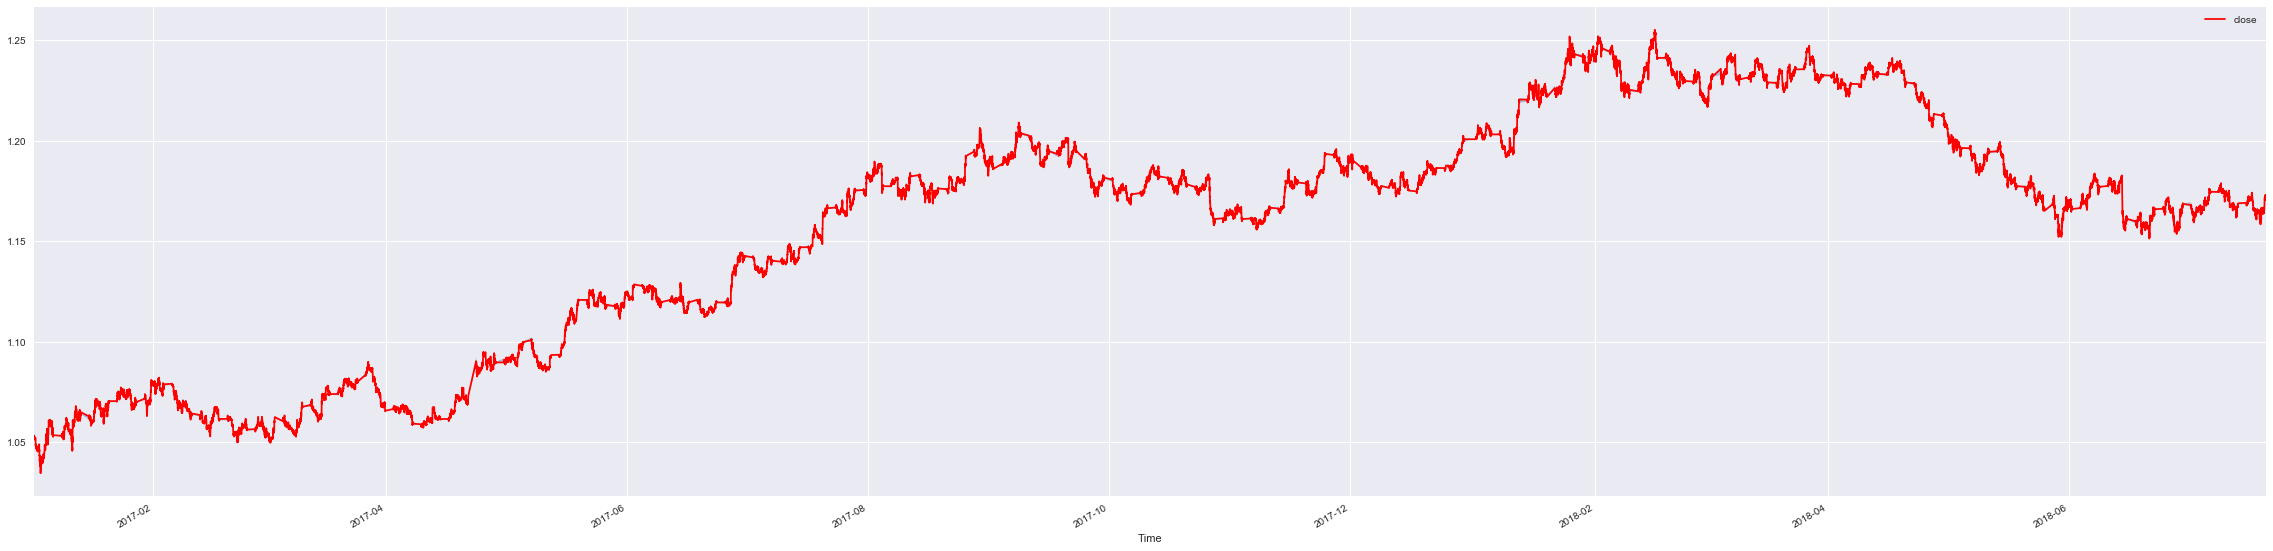

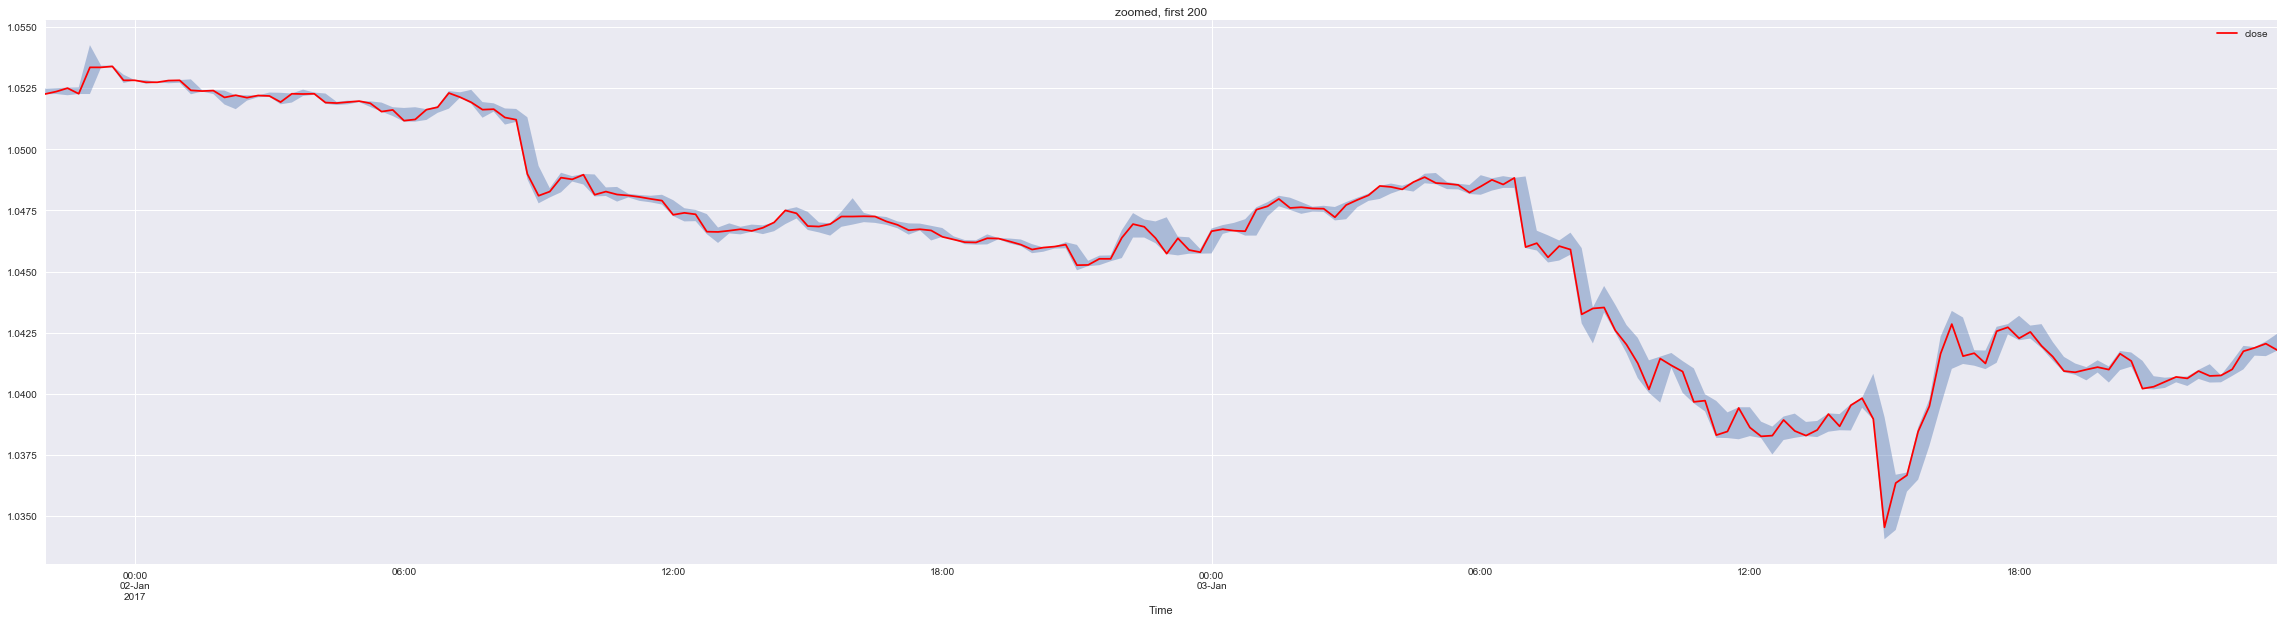

In [36]:
ax = df.plot(x=df.index, y='close', c='red', figsize=(40,10))
index = [str(item) for item in df.index]
plt.fill_between(x=index, y1='low',y2='high', data=df, alpha=0.4)
plt.show()

p = df[:200].copy()
ax = p.plot(x=p.index, y='close', c='red', figsize=(40,10))
index = [str(item) for item in p.index]
plt.fill_between(x=index, y1='low', y2='high', data=p, alpha=0.4)
plt.title('zoomed, first 200')
plt.show()

In [37]:
# Scale and create datasets
target_index = df.columns.tolist().index('close')
high_index = df.columns.tolist().index('high')
low_index = df.columns.tolist().index('low')
dataset = df.values.astype('float32')

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Create y_scaler to inverse it later
y_scaler = MinMaxScaler(feature_range=(0, 1))
t_y = df['close'].values.astype('float32')
t_y = np.reshape(t_y, (-1, 1))
y_scaler = y_scaler.fit(t_y)
    
# Set look_back to 20 which is 5 hours (15min*20)
X, y = create_dataset(dataset, look_back=20)
y = y[:,target_index]


In [38]:
# Set training data size
# We have a large enough dataset. So divid into 98% training / 1%  development / 1% test sets
train_size = int(len(X) * 0.99)
trainX = X[:train_size]
trainY = y[:train_size]
testX = X[train_size:]
testY = y[train_size:]

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense

# create a small LSTM network
model = Sequential()
model.add(LSTM(20, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(4, return_sequences=False))
model.add(Dense(4, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])
print(model.summary())

Using Theano backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 20)            2800      
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 20)            3280      
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 10)            1240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 10)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 4)                 240       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total para

In [40]:
import time
t0 = time.time()

# Save the best weight during training.
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mean_squared_error', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint]
history = model.fit(trainX, trainY, epochs=200, batch_size=500, verbose=0, callbacks=callbacks_list, validation_split=0.1)

print("time_cost: " + str(time.time() - t0))


Epoch 00001: val_mean_squared_error improved from inf to 0.19656, saving model to weights.best.hdf5

Epoch 00002: val_mean_squared_error improved from 0.19656 to 0.01613, saving model to weights.best.hdf5

Epoch 00003: val_mean_squared_error improved from 0.01613 to 0.00051, saving model to weights.best.hdf5

Epoch 00004: val_mean_squared_error improved from 0.00051 to 0.00041, saving model to weights.best.hdf5

Epoch 00005: val_mean_squared_error did not improve from 0.00041

Epoch 00006: val_mean_squared_error improved from 0.00041 to 0.00021, saving model to weights.best.hdf5

Epoch 00007: val_mean_squared_error did not improve from 0.00021

Epoch 00008: val_mean_squared_error improved from 0.00021 to 0.00020, saving model to weights.best.hdf5

Epoch 00009: val_mean_squared_error improved from 0.00020 to 0.00017, saving model to weights.best.hdf5

Epoch 00010: val_mean_squared_error did not improve from 0.00017

Epoch 00011: val_mean_squared_error improved from 0.00017 to 0.00008, 


Epoch 00107: val_mean_squared_error did not improve from 0.00002

Epoch 00108: val_mean_squared_error did not improve from 0.00002

Epoch 00109: val_mean_squared_error did not improve from 0.00002

Epoch 00110: val_mean_squared_error did not improve from 0.00002

Epoch 00111: val_mean_squared_error did not improve from 0.00002

Epoch 00112: val_mean_squared_error did not improve from 0.00002

Epoch 00113: val_mean_squared_error did not improve from 0.00002

Epoch 00114: val_mean_squared_error did not improve from 0.00002

Epoch 00115: val_mean_squared_error did not improve from 0.00002

Epoch 00116: val_mean_squared_error did not improve from 0.00002

Epoch 00117: val_mean_squared_error did not improve from 0.00002

Epoch 00118: val_mean_squared_error improved from 0.00002 to 0.00002, saving model to weights.best.hdf5

Epoch 00119: val_mean_squared_error did not improve from 0.00002

Epoch 00120: val_mean_squared_error did not improve from 0.00002

Epoch 00121: val_mean_squared_error 

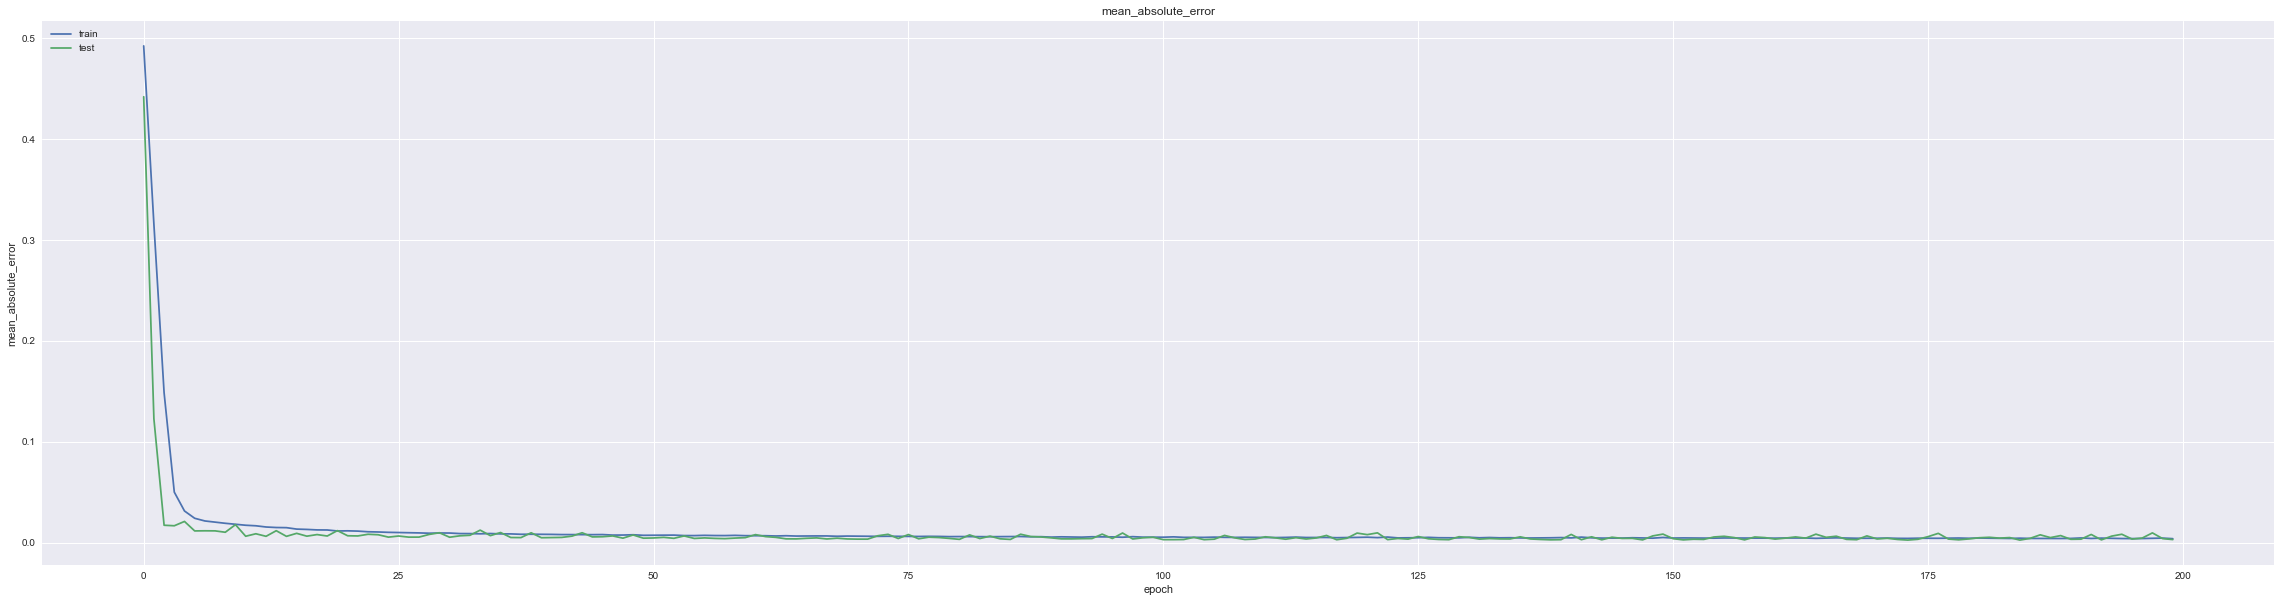

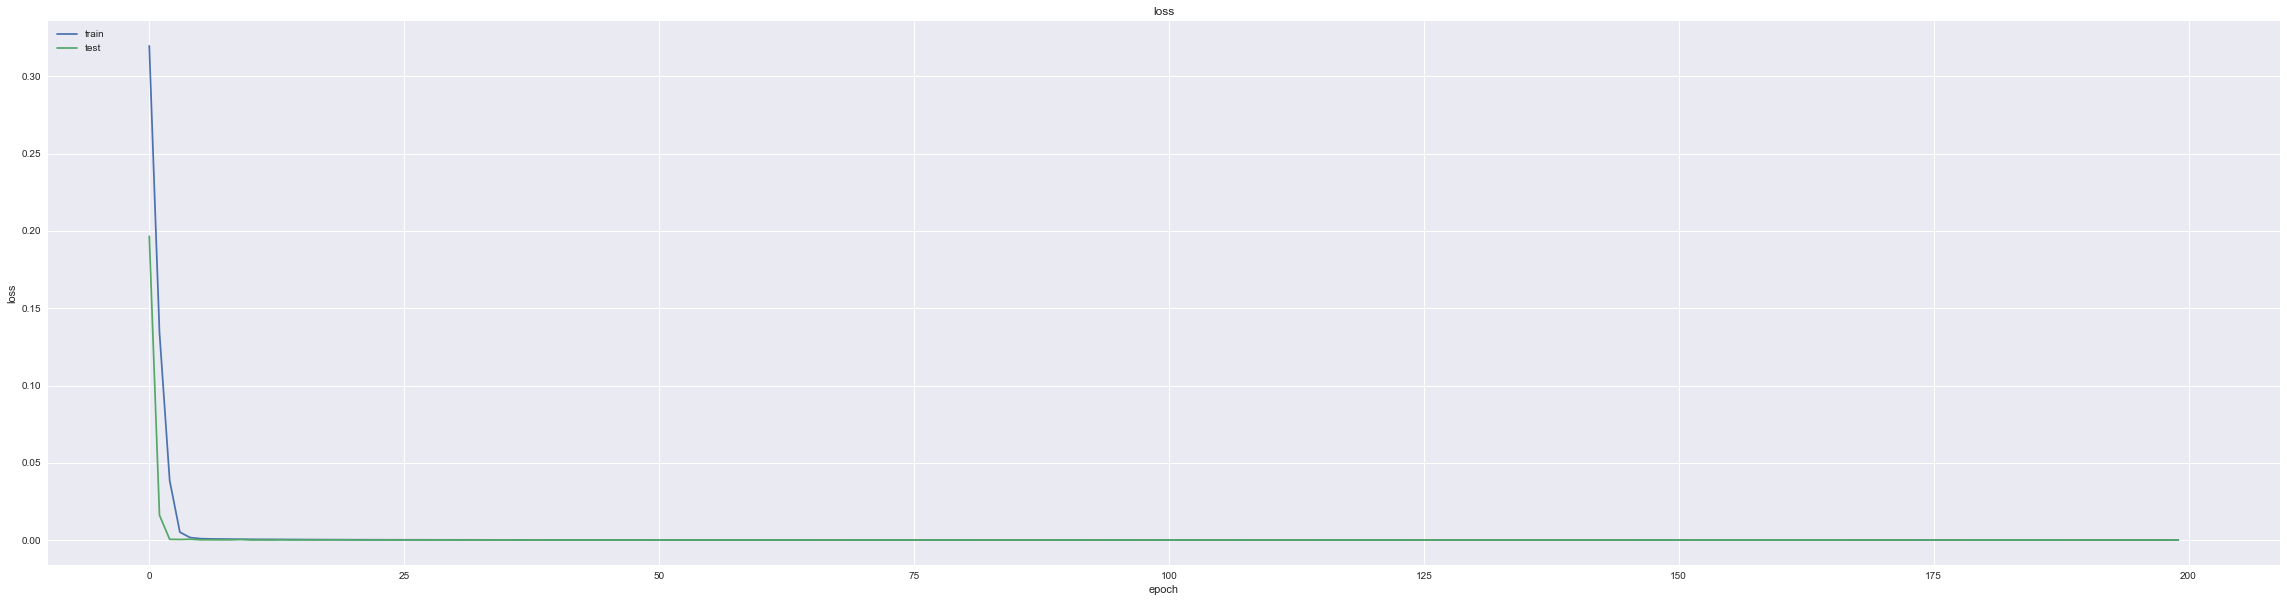

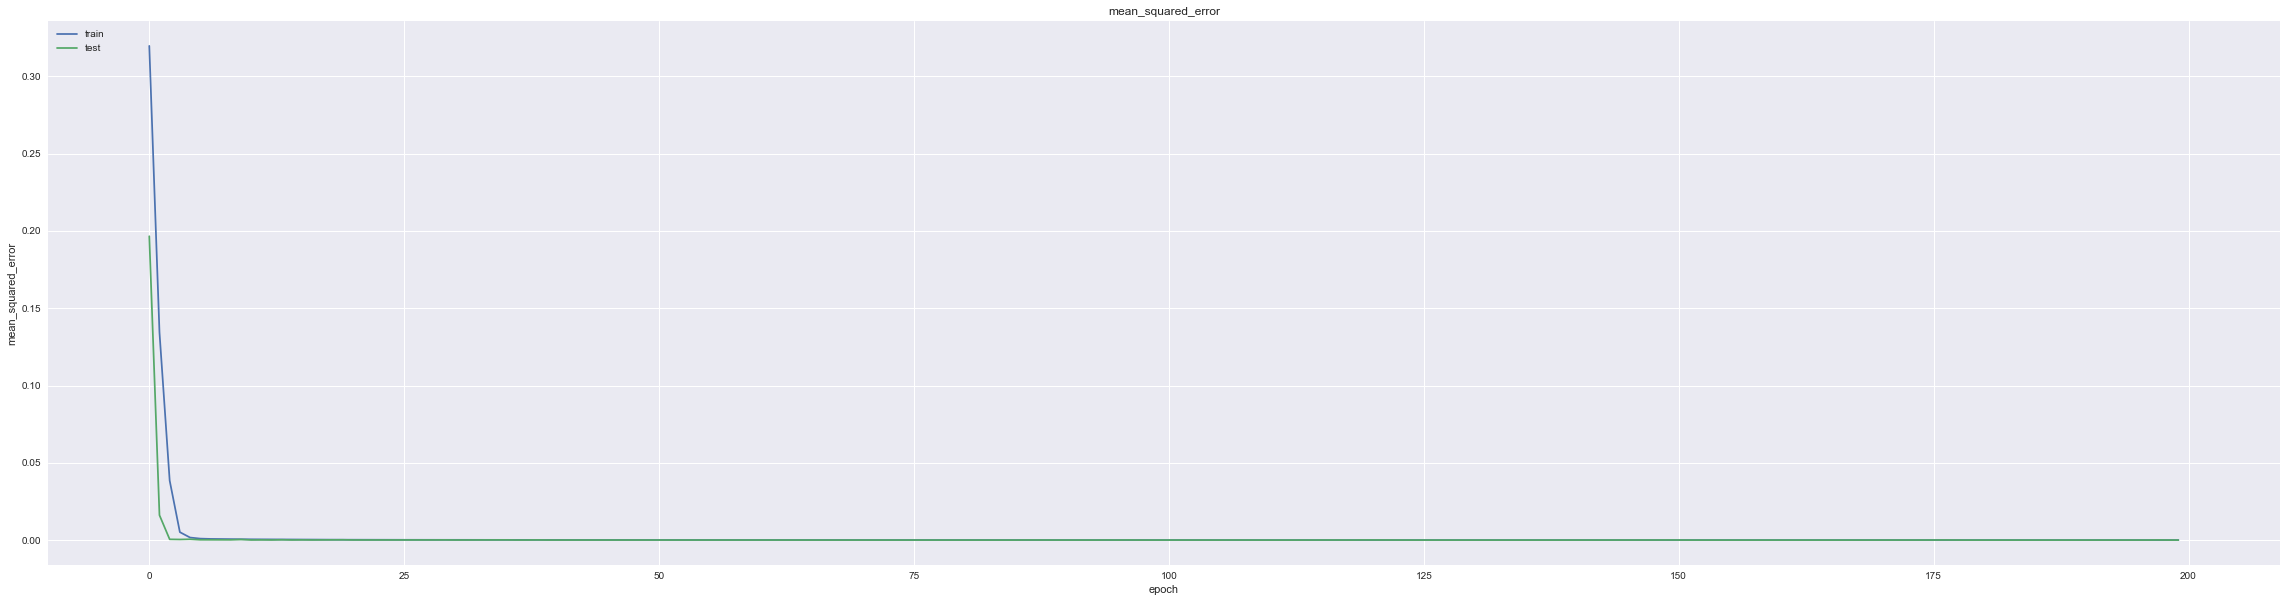

In [41]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(40,10))
        plt.plot(history.history[k])
        plt.plot(history.history['val_' + k])
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [42]:
min(history.history['val_mean_absolute_error'])

0.0025042837311607894

In [43]:
# Baby the model a bit
# Load the weight that worked the best
model.load_weights("weights.best.hdf5")

# Train again with decaying learning rate
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = float(K.get_value(model.optimizer.lr))
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
        #print("type: " + str(type(K.get_value(model.optimizer.lr)))
    return float(K.get_value(model.optimizer.lr))

scheduler(12)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay]
import time
t0 = time.time()
history = model.fit(trainX, trainY, epochs=int(epoch/3), batch_size=500, verbose=0, callbacks=callbacks_list, validation_split=0.1)
print("time cost optimized: " + str(time.time() - t0))

lr changed to 0.0009000000427477062

Epoch 00001: val_mean_squared_error did not improve from 0.00001

Epoch 00002: val_mean_squared_error did not improve from 0.00001
lr changed to 0.0008100000384729356

Epoch 00003: val_mean_squared_error did not improve from 0.00001

Epoch 00004: val_mean_squared_error did not improve from 0.00001
lr changed to 0.0007290000503417104

Epoch 00005: val_mean_squared_error did not improve from 0.00001

Epoch 00006: val_mean_squared_error did not improve from 0.00001
lr changed to 0.0006561000715009868

Epoch 00007: val_mean_squared_error did not improve from 0.00001

Epoch 00008: val_mean_squared_error did not improve from 0.00001
lr changed to 0.0005904900433961303

Epoch 00009: val_mean_squared_error did not improve from 0.00001

Epoch 00010: val_mean_squared_error did not improve from 0.00001
lr changed to 0.0005314410547725857

Epoch 00011: val_mean_squared_error did not improve from 0.00001

Epoch 00012: val_mean_squared_error did not improve from 

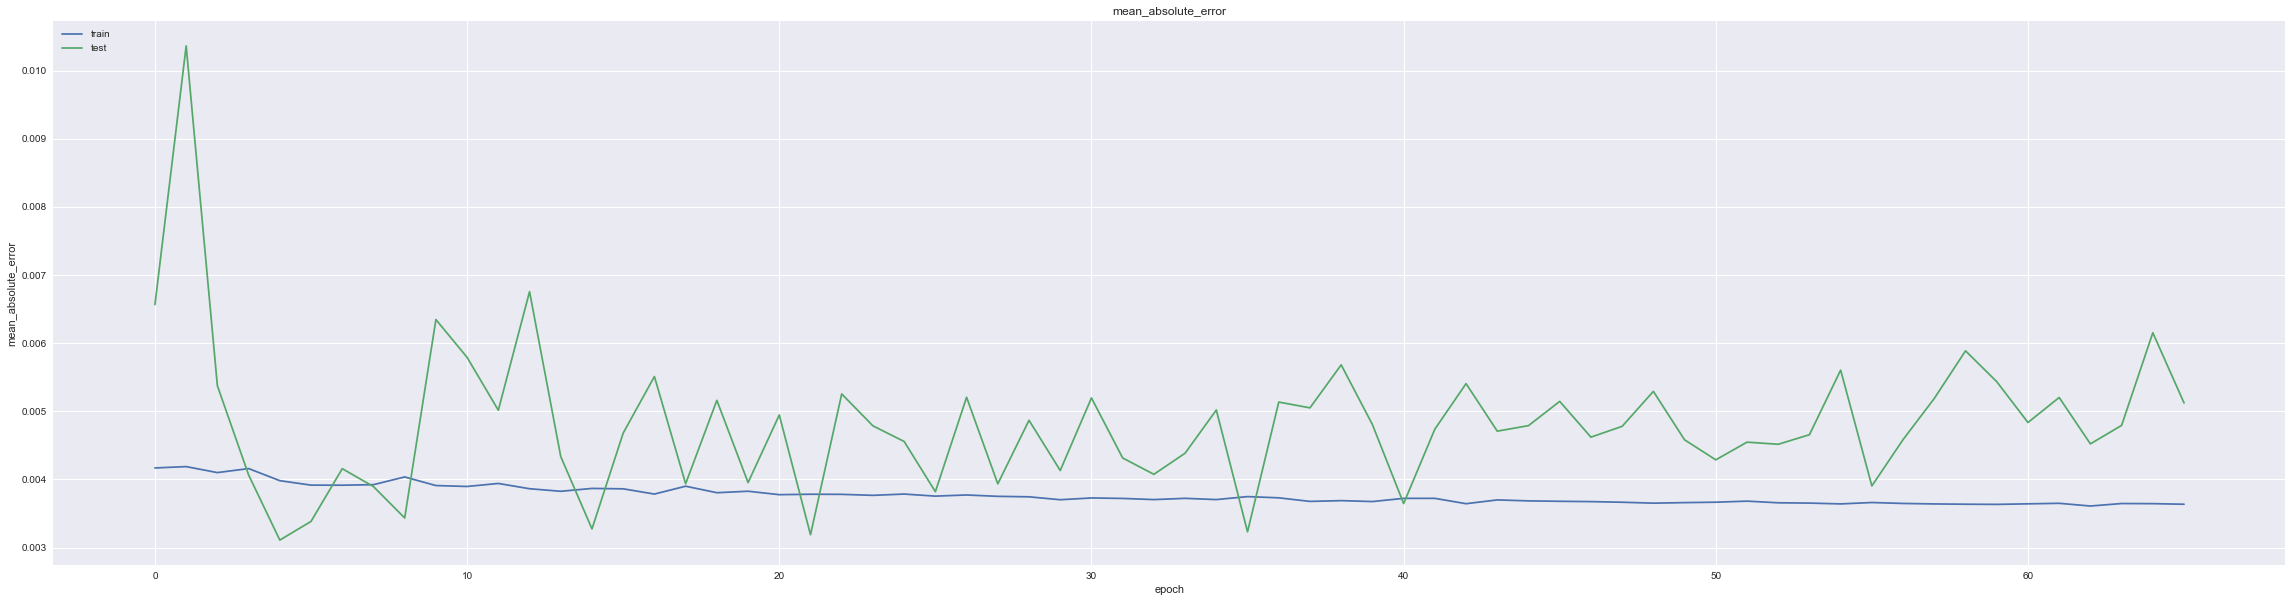

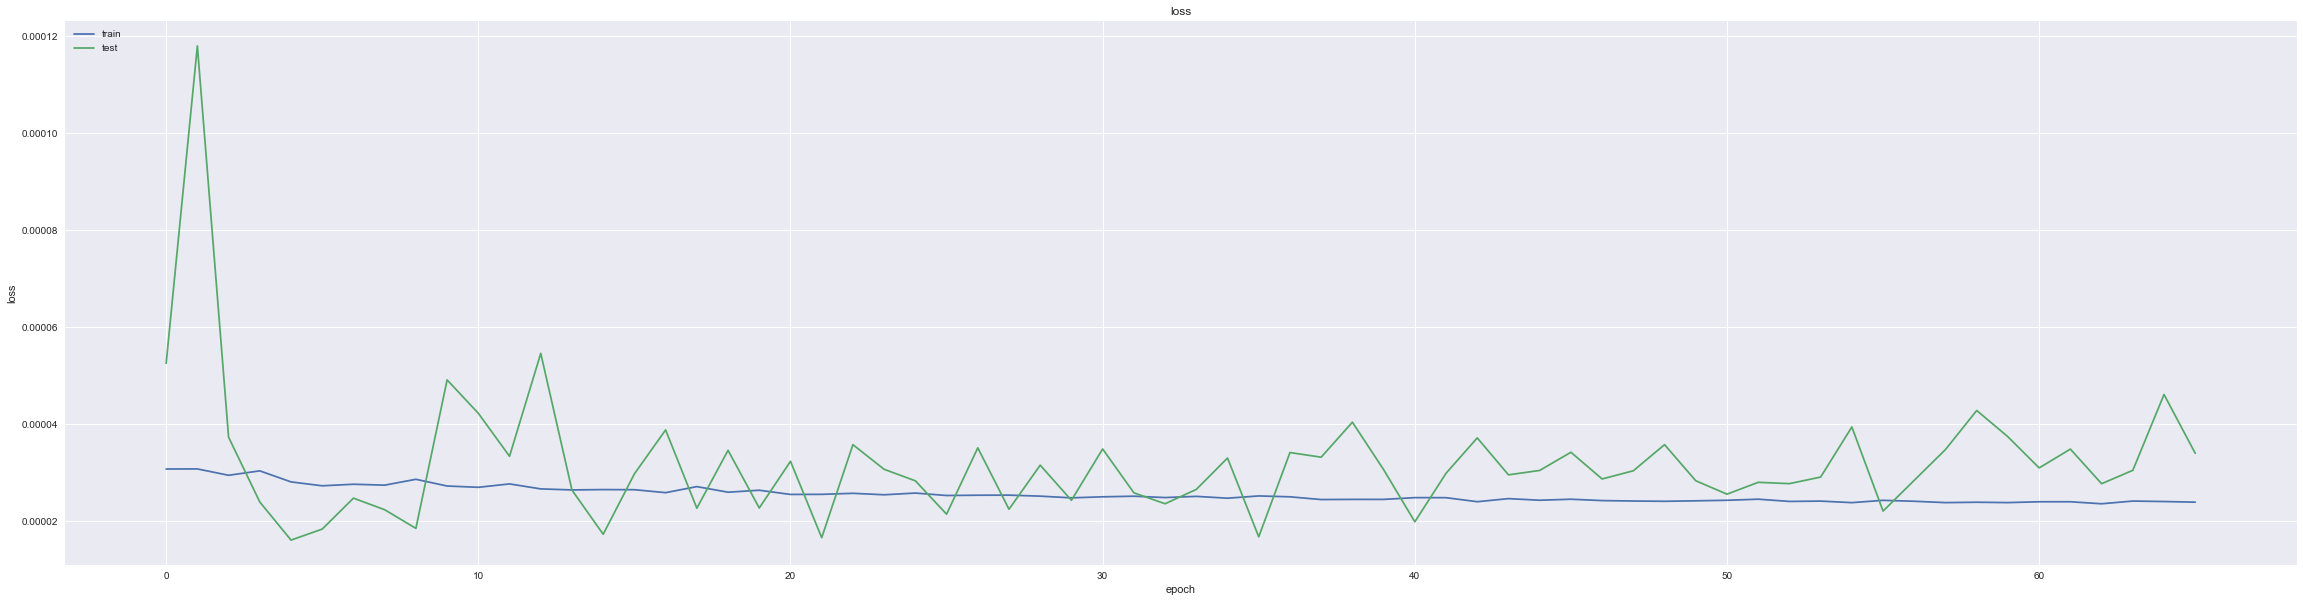

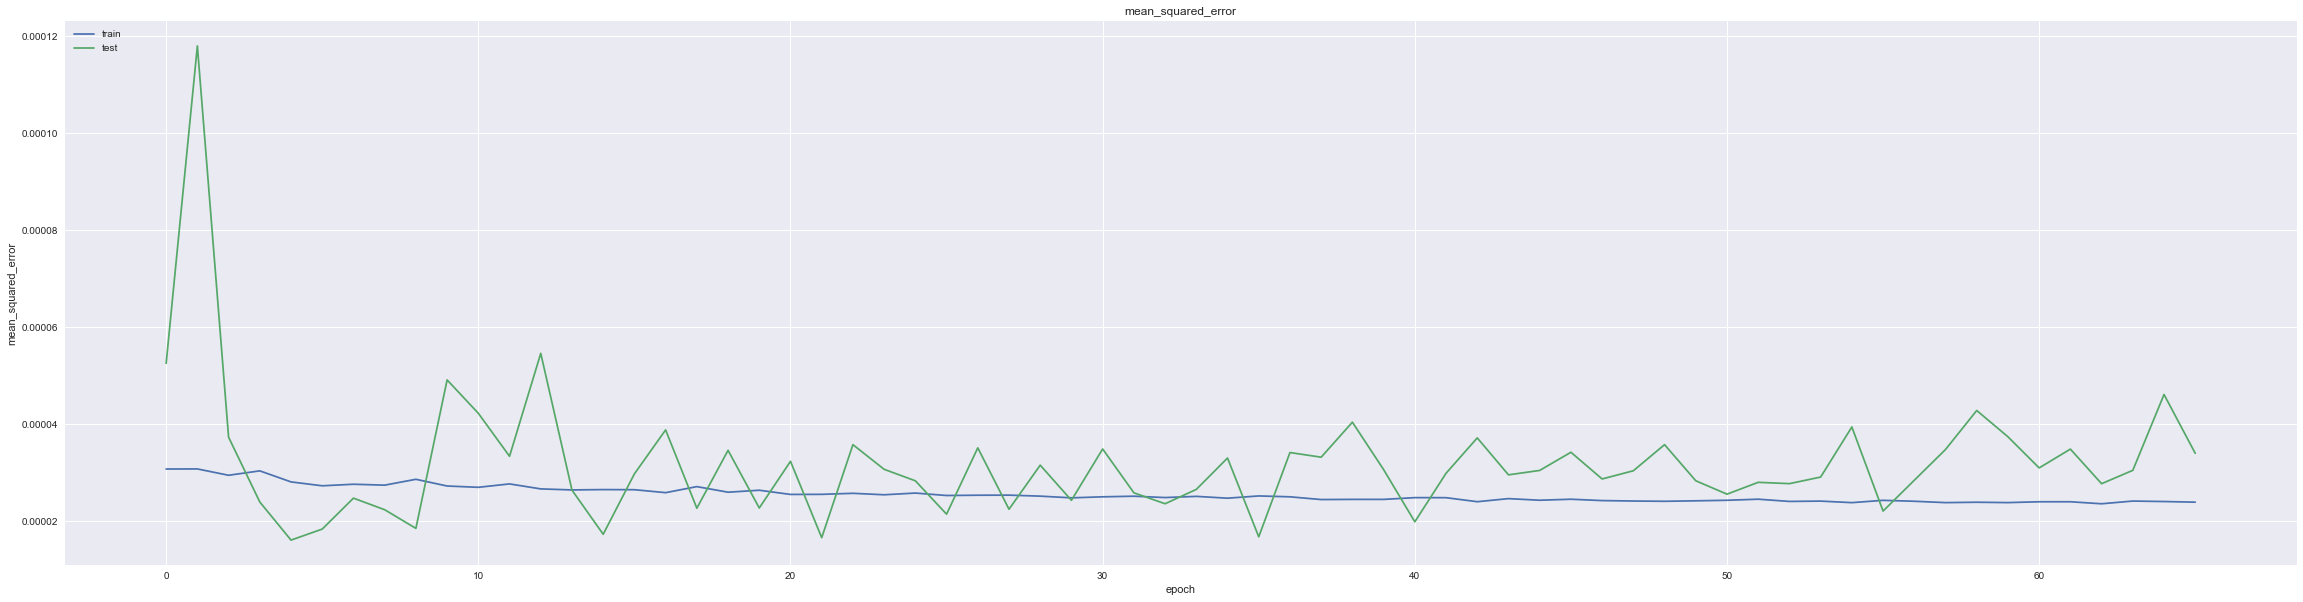

In [45]:
epoch = len(history.history['loss'])
for k in list(history.history.keys()):
    if 'val' not in k:
        plt.figure(figsize=(40,10))
        plt.plot(history.history[k])
        plt.plot(history.history['val_' + k])
        plt.title(k)
        plt.ylabel(k)
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

In [47]:
min(history.history['val_mean_absolute_error'])

"""
The variance should have improved slightly. However, unless the mean absolute error is not small enough. 
The model is still not an usable model in practice. 
This is mainly due to only using the sample data for training and limiting epoch to a few hundreds.
"""

'\nThe variance should have improved slightly. However, unless the mean absolute error is not small enough. \nThe model is still not an usable model in practice. \nThis is mainly due to only using the sample data for training and limiting epoch to a few hundreds.\n'

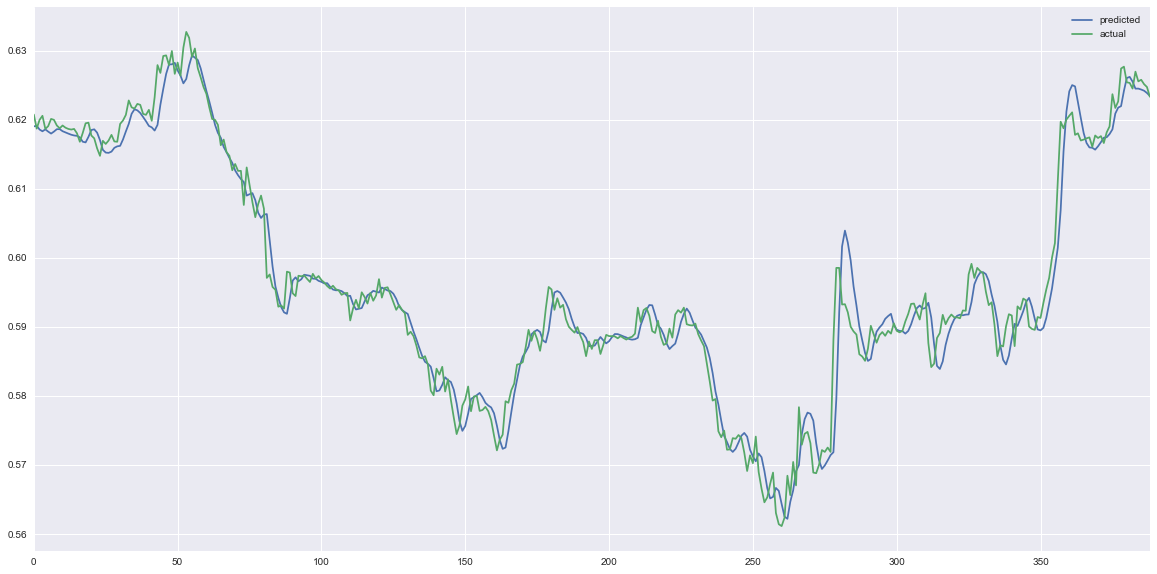

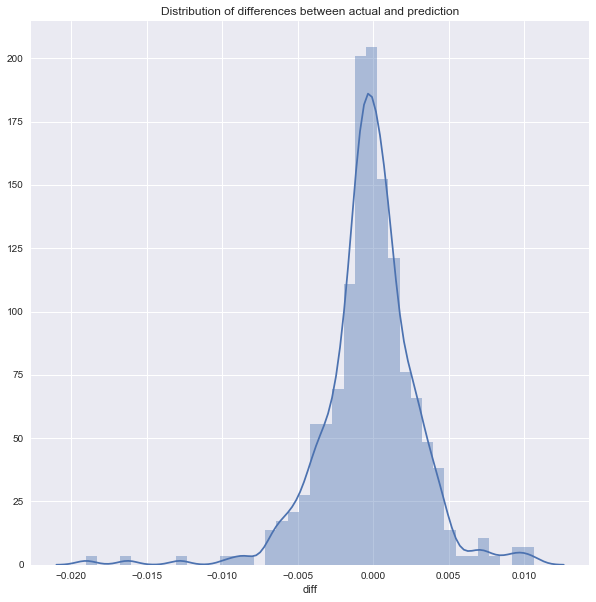

MSE :  9.90575251925e-06
MAE :  0.00215496854488


count    389.000000
mean      -0.000228
std        0.003143
min       -0.019023
25%       -0.001455
50%       -0.000143
75%        0.001296
max        0.010653
Name: diff, dtype: float64

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Benchmark
model.load_weights("weights.best.hdf5")

pred = model.predict(testX)

predictions = pd.DataFrame()
predictions['predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['actual'] = testY
predictions = predictions.astype(float)

predictions.plot(figsize=(20,10))
plt.show()

predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
predictions['diff'].describe()

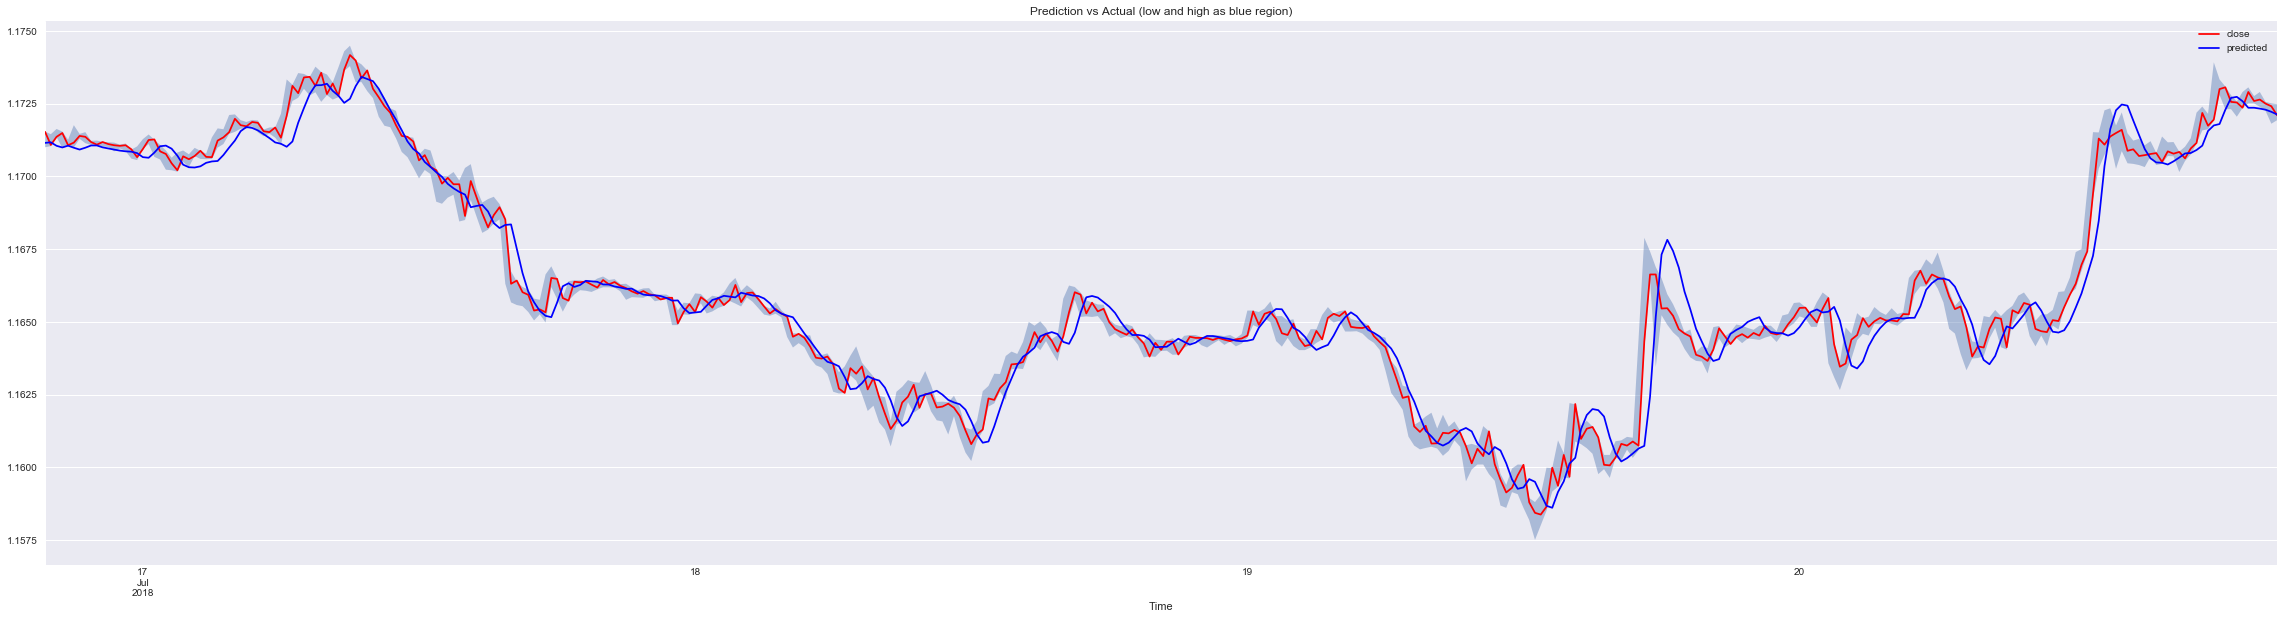

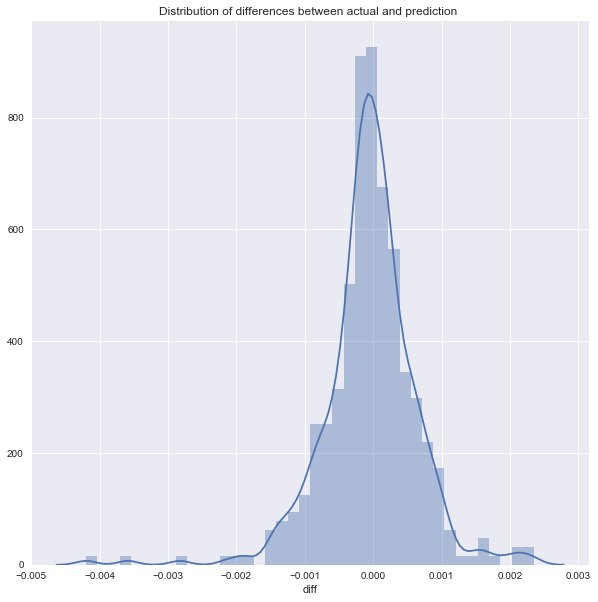

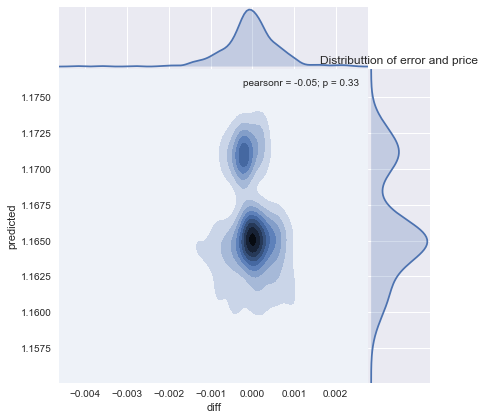

MSE :  4.82446753879e-07
MAE :  0.000475576113919


count    389.000000
mean      -0.000050
std        0.000694
min       -0.004198
25%       -0.000321
50%       -0.000032
75%        0.000286
max        0.002351
Name: diff, dtype: float64

In [49]:
pred = model.predict(testX)
pred = y_scaler.inverse_transform(pred)
close = y_scaler.inverse_transform(np.reshape(testY, (testY.shape[0], 1)))
predictions = pd.DataFrame()
predictions['predicted'] = pd.Series(np.reshape(pred, (pred.shape[0])))
predictions['close'] = pd.Series(np.reshape(close, (close.shape[0])))

p = df[-pred.shape[0]:].copy()
predictions.index = p.index
predictions = predictions.astype(float)
predictions = predictions.merge(p[['low', 'high']], right_index=True, left_index=True)

ax = predictions.plot(x=predictions.index, y='close', c='red', figsize=(40,10))
ax = predictions.plot(x=predictions.index, y='predicted', c='blue', figsize=(40,10), ax=ax)
index = [str(item) for item in predictions.index]
plt.fill_between(x=index, y1='low', y2='high', data=p, alpha=0.4)
plt.title('Prediction vs Actual (low and high as blue region)')
plt.show()

predictions['diff'] = predictions['predicted'] - predictions['close']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction ')
plt.show()

g = sns.jointplot("diff", "predicted", data=predictions, kind="kde", space=0)
plt.title('Distributtion of error and price')
plt.show()

# predictions['correct'] = (predictions['predicted'] <= predictions['high']) & (predictions['predicted'] >= predictions['low'])
# sns.factorplot(data=predictions, x='correct', kind='count')

print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['close'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['close'].values))
predictions['diff'].describe()